In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aarthiabscds","key":"c066507c9c6eb63992d79e884fe8e163"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prasunroy/natural-images

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0


In [ ]:
!unzip /content/natural-images.zip -d ./dataset/

Streaming output truncated to the last 5000 lines.
  inflating: ./dataset/natural_images/cat/cat_0204.jpg  
  inflating: ./dataset/natural_images/cat/cat_0205.jpg  
  inflating: ./dataset/natural_images/cat/cat_0206.jpg  
  inflating: ./dataset/natural_images/cat/cat_0207.jpg  
  inflating: ./dataset/natural_images/cat/cat_0208.jpg  
  inflating: ./dataset/natural_images/cat/cat_0209.jpg  
  inflating: ./dataset/natural_images/cat/cat_0210.jpg  
  inflating: ./dataset/natural_images/cat/cat_0211.jpg  
  inflating: ./dataset/natural_images/cat/cat_0212.jpg  
  inflating: ./dataset/natural_images/cat/cat_0213.jpg  
  inflating: ./dataset/natural_images/cat/cat_0214.jpg  
  inflating: ./dataset/natural_images/cat/cat_0215.jpg  
  inflating: ./dataset/natural_images/cat/cat_0216.jpg  
  inflating: ./dataset/natural_images/cat/cat_0217.jpg  
  inflating: ./dataset/natural_images/cat/cat_0218.jpg  
  inflating: ./dataset/natural_images/cat/cat_0219.jpg  
  inflating: ./dataset/natural_images

In [ ]:
import os
import zipfile
from PIL import Image
import numpy as np

# Step 1: Extract ZIP file
with zipfile.ZipFile('/content/natural-images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to a folder

# Step 2: Load images and labels
images = []
labels = []

dataset_path = '/content/dataset'

for root, dirs, files in os.walk(dataset_path):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, filename)

            # Load image and resize to consistent dimensions (e.g., 64x64)
            img = Image.open(img_path).convert('RGB')  # Convert all to RGB
            img = img.resize((64, 64))  # Resize

            # Append image array and label
            images.append(np.array(img))
            label = os.path.basename(root)  # Use folder name as label
            labels.append(label)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Total images: {len(images)}")
print(f"Image shape: {images[0].shape}")
print(f"Unique labels: {np.unique(labels)}")

Total images: 13798
Image shape: (64, 64, 3)
Unique labels: ['airplane' 'car' 'cat' 'dog' 'flower' 'fruit' 'motorbike' 'person']


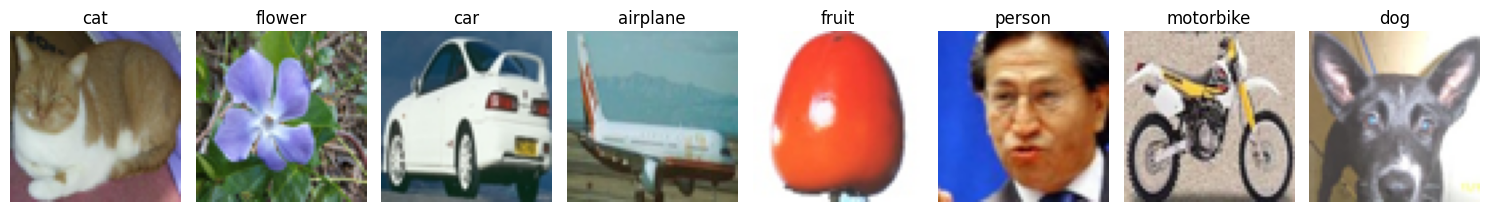

In [ ]:
# Create a dictionary to hold one sample image per class
import matplotlib.pyplot as plt
class_samples = {}

for root, dirs, files in os.walk(dataset_path):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.png')):
            label = os.path.basename(root)  # Use folder name as label

            # Check if we already have a sample for this class
            if label not in class_samples:
                img_path = os.path.join(root, filename)
                img = Image.open(img_path).convert('RGB')  # Convert to RGB
                img = img.resize((64, 64))  # Resize for consistency
                class_samples[label] = img  # Store the sample image

# Convert dictionary to lists for visualization
sample_images = list(class_samples.values())
sample_labels = list(class_samples.keys())

# Step 3: Display Sample Images from Each Class
def display_sample_images(sample_images, sample_labels):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(sample_images):
        plt.subplot(1, len(sample_images), i + 1)  # Create subplots based on number of classes
        plt.imshow(img)
        plt.title(sample_labels[i])
        plt.axis('off')
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Call the function to display one sample image from each class
display_sample_images(sample_images, sample_labels)

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [ ]:
# Normalize pixel values
images = images / 255.0  # Scale pixel values to [0, 1]

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 9658
Validation set size: 2070
Test set size: 2070


In [ ]:
# Load dataset
images = []
labels = []
dataset_path = '/content/dataset'

for root, dirs, files in os.walk(dataset_path):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, filename)
            img = Image.open(img_path).convert('RGB')
            img = img.resize((64, 64))
            images.append(np.array(img))
            label = os.path.basename(root)
            labels.append(label)

# Convert to NumPy arrays
images = np.array(images) / 255.0  # Normalize
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Flatten images for clustering
X_flattened = images.reshape(images.shape[0], -1)

In [ ]:

# Apply PCA before K-Means
pca = PCA(n_components=50)  # Reduce to 50 features
X_pca = pca.fit_transform(X_flattened)

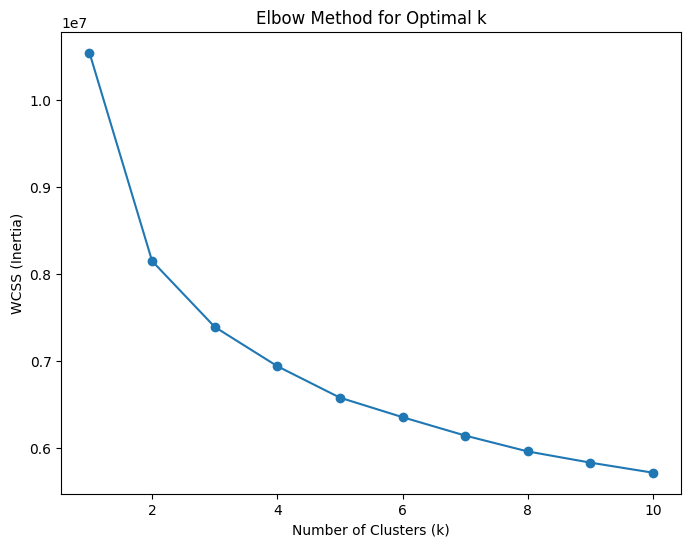

In [ ]:
# Determine optimal k using elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

WCSS for k=3: 7389707.373236788


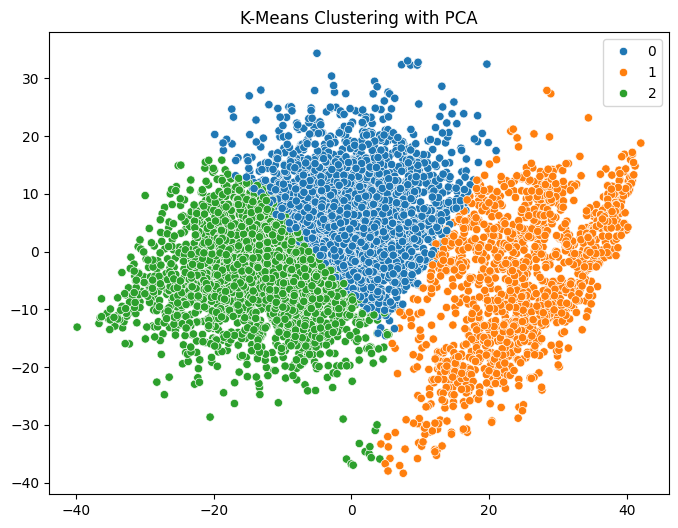

In [ ]:
# Apply K-Means with optimal k
optimal_k = 3  # Choose k based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Calculate WCSS
wcss = kmeans.inertia_
print(f'WCSS for k={optimal_k}: {wcss}')

# Visualize clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='tab10')
plt.title('K-Means Clustering with PCA')
plt.show()

In [ ]:
# Train-Test Split for SVM
X_train, X_test, y_train, y_test = train_test_split(X_pca, encoded_labels, test_size=0.2, random_state=42)

In [ ]:
# Train SVM Model
svm_model = SVC(kernel='rbf', C=10, gamma='scale')  # Best parameters found via tuning
svm_model.fit(X_train, y_train)

# Evaluate SVM
y_pred = svm_model.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM Classification Report:
               precision    recall  f1-score   support

    airplane       0.99      0.99      0.99       306
         car       0.97      0.97      0.97       387
         cat       0.84      0.85      0.84       346
         dog       0.82      0.83      0.82       268
      flower       0.96      0.91      0.94       362
       fruit       1.00      1.00      1.00       411
   motorbike       0.97      0.98      0.98       319
      person       0.98      0.99      0.99       361

    accuracy                           0.95      2760
   macro avg       0.94      0.94      0.94      2760
weighted avg       0.95      0.95      0.95      2760

SVM Accuracy: 0.9456521739130435


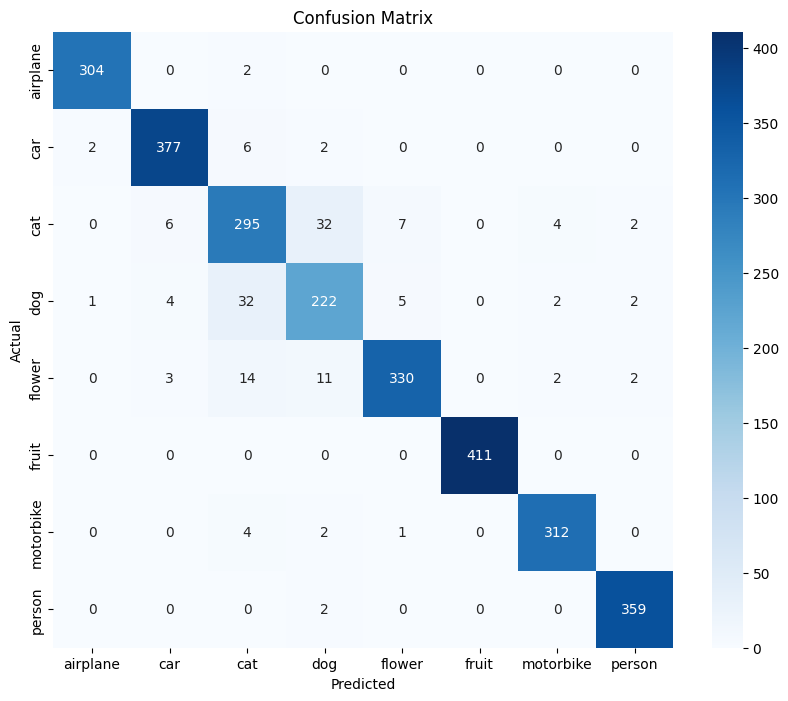

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Reshape X_train to 2D: (num_samples, num_features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
rf_model.fit(X_train_reshaped, y_train)

# Evaluate Random Forest
# Reshape X_test to 2D for prediction
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
y_pred_rf = rf_model.predict(X_test_reshaped)

print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

    airplane       1.00      0.97      0.98       306
         car       0.95      0.97      0.96       387
         cat       0.84      0.88      0.86       346
         dog       0.87      0.87      0.87       268
      flower       0.96      0.90      0.93       362
       fruit       0.99      1.00      1.00       411
   motorbike       0.97      0.94      0.96       319
      person       0.96      0.99      0.98       361

    accuracy                           0.94      2760
   macro avg       0.94      0.94      0.94      2760
weighted avg       0.95      0.94      0.95      2760

Random Forest Accuracy: 0.9449275362318841


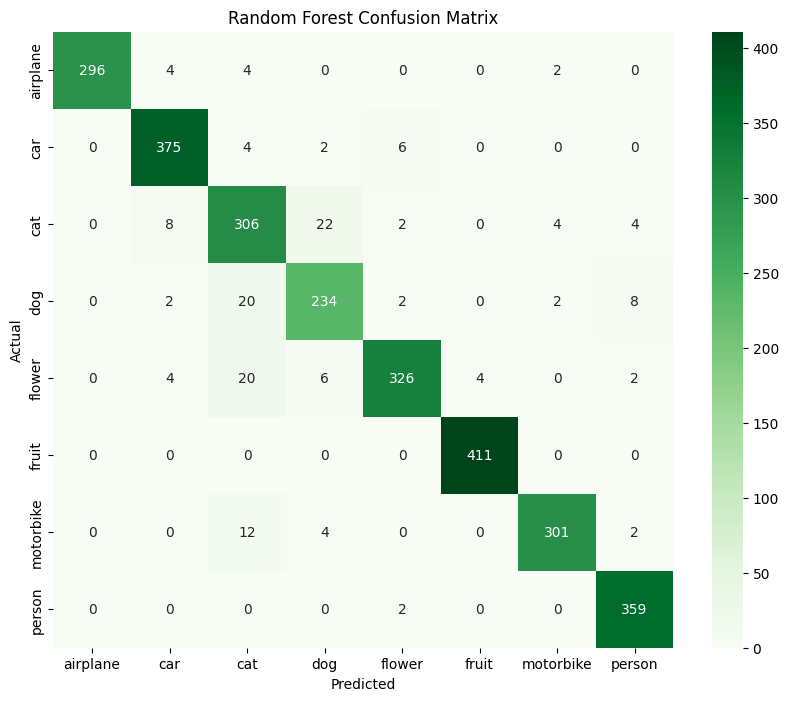

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

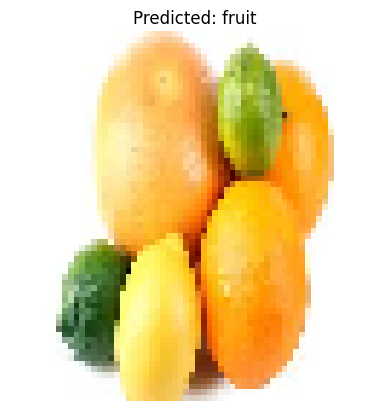

np.str_('fruit')

In [ ]:
# Image Prediction Function
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Load image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_flattened = img_array.flatten().reshape(1, -1)  # Flatten & reshape

    # Apply PCA transformation
    img_pca = pca.transform(img_flattened)  # Reduce to 50 features

    # Predict using SVM
    prediction_index = svm_model.predict(img_pca)[0]
    predicted_label = label_encoder.inverse_transform([prediction_index])[0]  # Convert back to original label

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

# Example Usage
predict_image('/content/fruit.jpg')